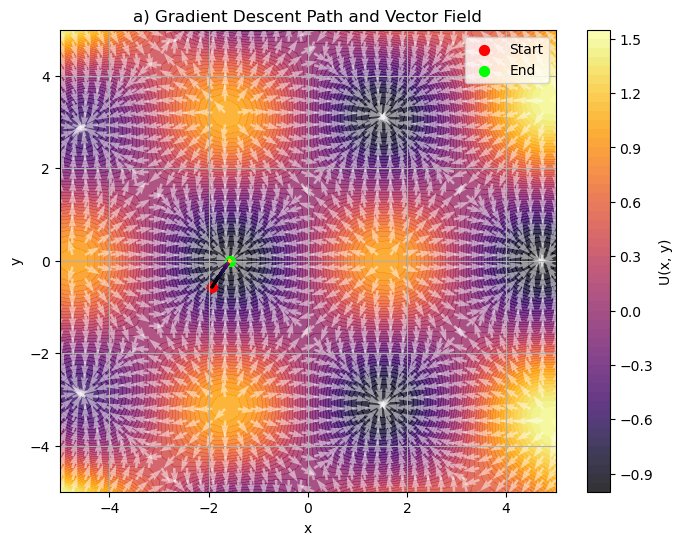

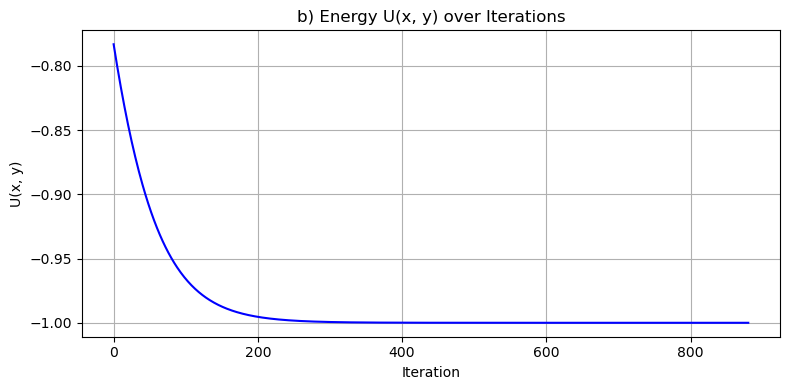

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# === Potential function and its gradient ===
def U(x, y):
    """Energy function U(x, y)"""
    return np.sin(x) * np.cos(y) + 2 * (x * y)**2 / 1000

def grad_U(x, y):
    """Gradient of U"""
    dU_dx = np.cos(x) * np.cos(y) + 4 * x * y**2 / 1000
    dU_dy = -np.sin(x) * np.sin(y) + 4 * y * x**2 / 1000
    return np.array([dU_dx, dU_dy])

# === Gradient Descent algorithm ===
def gradient_descent_2D(xy0, lr=0.01, max_iter=1000, tol=1e-6):
    """Performs gradient descent from initial point xy0"""
    xy = np.array(xy0)
    trajectory = [xy.copy()]
    energies = [U(xy[0], xy[1])]

    for _ in range(max_iter):
        grad = grad_U(xy[0], xy[1])
        new_xy = xy - lr * grad
        if np.linalg.norm(new_xy - xy) < tol:
            break
        xy = new_xy
        trajectory.append(xy.copy())
        energies.append(U(xy[0], xy[1]))

    return np.array(trajectory), energies

# === Initial point and parameters ===
x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)
trajectory, energies = gradient_descent_2D([x0, y0], lr=0.01)

# === Prepare vector field for visualization ===
x_vals = np.linspace(-5, 5, 40)
y_vals = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

# Calculate gradient vectors for the field
U_dx, U_dy = grad_U(X, Y)
U_norm = np.sqrt(U_dx**2 + U_dy**2)
U_dx /= U_norm + 1e-8
U_dy /= U_norm + 1e-8

# === a) Contour + gradient vector field + trajectory ===
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='inferno', alpha=0.8)
plt.quiver(X, Y, -U_dx, -U_dy, color='white', alpha=0.5, scale=30, width=0.005)

# Plot trajectory
colors = np.linspace(0, 1, len(trajectory))
for i in range(len(trajectory) - 1):
    plt.plot(trajectory[i:i+2, 0], trajectory[i:i+2, 1], color=plt.cm.inferno(colors[i]), linewidth=2)

# Start and end points
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='red', label='Start', s=50)
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='lime', label='End', s=50)

plt.title("a) Gradient Descent Path and Vector Field")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.colorbar(contour, label='U(x, y)')
plt.grid(True)

# === b) Energy over iterations ===
plt.figure(figsize=(8, 4))
plt.plot(energies, color='blue')
plt.title("b) Energy U(x, y) over Iterations")
plt.xlabel("Iteration")
plt.ylabel("U(x, y)")
plt.grid(True)

plt.tight_layout()
plt.show()

